In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
import astropy.cosmology.units as cu
from astropy.cosmology import WMAP9

from utils import galactic_distances

In [2]:
def app2abs(distance, app_mag):
    """
    Convert apparent magnitude to absolute magnitude, given a distance in Mpc
    """

    d = distance * u.Mpc 
    abs_mag = app_mag - (2.5 * np.log10(((d.value*10**6)/10)**2))

    #print(f'At distance = {np.round(d,2)}, the absolute magnitude is {np.round(abs_mag,2)}')

    return abs_mag

## Near distance absolute magnitude ranges

In [49]:
# create range of distances
dist_max = 21. # kpc
d_range = np.arange(0., dist_max, 0.1)

In [59]:
# calculate absolute magnitude for each distance
abs_mags_peak = []
abs_mags_qsnt = []

# magnitudes chosen from AT2022kak, a fast evolving transient
# peak magnitude (g-band)
app_mag_peak = 19.22 

# quiescent magitude (g-band)
app_mag_qsnt = 23.23

for d in d_range:
    d_mpc = d / 1000
    abs_mag_peak = app2abs(d_mpc, app_mag_peak)
    abs_mags_peak.append(abs_mag_peak)

    abs_mag_qsnt = app2abs(d_mpc, app_mag_qsnt)
    abs_mags_qsnt.append(abs_mag_qsnt)

/tmp/ipykernel_3375/1327424341.py:7: RuntimeWarning: divide by zero encountered in log10
  abs_mag = app_mag - (2.5 * np.log10(((d.value*10**6)/10)**2))


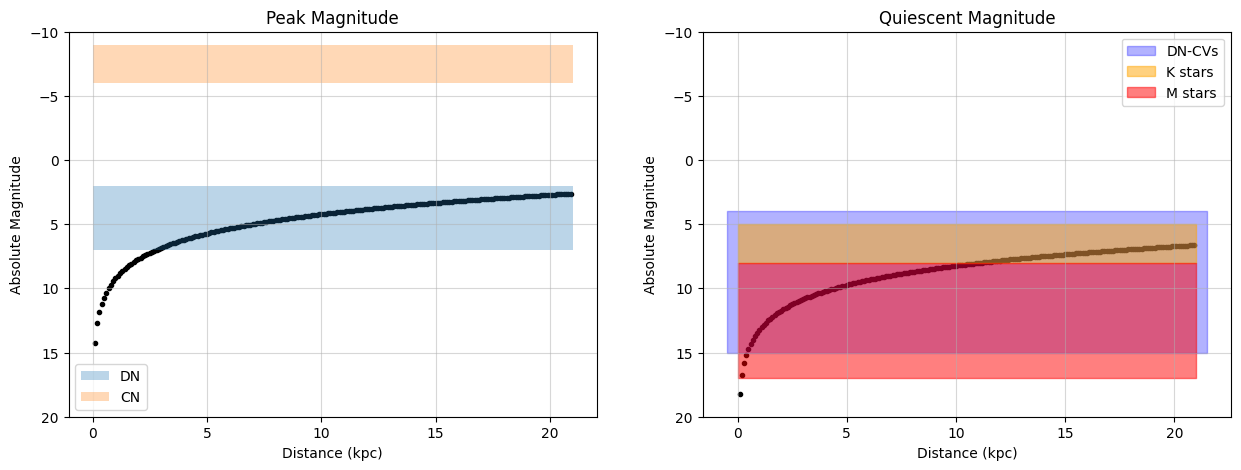

In [52]:
# plot absolute magnitude for transient at peak and quiescent magnitudes, while shifting the distance
# dwarf novae and classsical novae ranges shown for comparison

# Peak magnitude ranges
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.scatter(d_range, abs_mags_peak, marker='.', color='k')
# ax1.axhline(5.2, ls='--')
ax1.fill_between([0,dist_max], 2, 7, alpha = 0.3, label='DN') # Kawash, A. et al (2021)
ax1.fill_between([0,dist_max], -9, -6, alpha = 0.3, label='CN') # Kawash, A. et al (2021) (-10 -- -4), from Allen Shafter (-7.5 +/- 1.5)

ax1.set_ylabel('Absolute Magnitude')
ax1.set_xlabel('Distance (kpc)')
ax1.set_ylim([20,-10])
ax1.grid(alpha=0.5) 
ax1.set_title('Peak Magnitude')
ax1.legend()

#############################################

# Quiescent magnitude ranges
ax2.scatter(d_range, abs_mags_qsnt, marker='.', color='k')
ax2.fill_between([-0.5,dist_max+0.5], 4, 15, alpha = 0.3, color='blue', label='DN-CVs') # Coppejans, D. et al. (2016) 
ax2.fill_between([0,dist_max], 5,8, alpha = 0.5, color='orange', label='K stars')
ax2.fill_between([0,dist_max], 8, 17, alpha = 0.5, color='red', label='M stars')

ax2.set_ylabel('Absolute Magnitude')
ax2.set_xlabel('Distance (kpc)')
ax2.set_title('Quiescent Magnitude')
ax2.set_ylim([20,-10])
ax2.grid(alpha=0.5)
ax2.legend()

## Far distance absolute magnitude ranges

In [53]:
# create range of distances
dist_max = 1001. # Mpc
d_range_far = np.arange(0., dist_max, 1)

In [54]:
# calculate absolute magnitude for each distance
abs_mags_peak_far = []
abs_mags_qsnt = []

# peak magnitude (g-band)
app_mag_peak = 19.22 

# quiescent magitude (g-band)
app_mag_qsnt = 23.23

for d in d_range_far:
    d_mpc = d 
    abs_mag_peak_far = app2abs(d_mpc, app_mag_peak)
    abs_mags_peak_far.append(abs_mag_peak_far)

    abs_mag_qsnt = app2abs(d_mpc, app_mag_qsnt)
    abs_mags_qsnt.append(abs_mag_qsnt)

/tmp/ipykernel_3375/1327424341.py:7: RuntimeWarning: divide by zero encountered in log10
  abs_mag = app_mag - (2.5 * np.log10(((d.value*10**6)/10)**2))


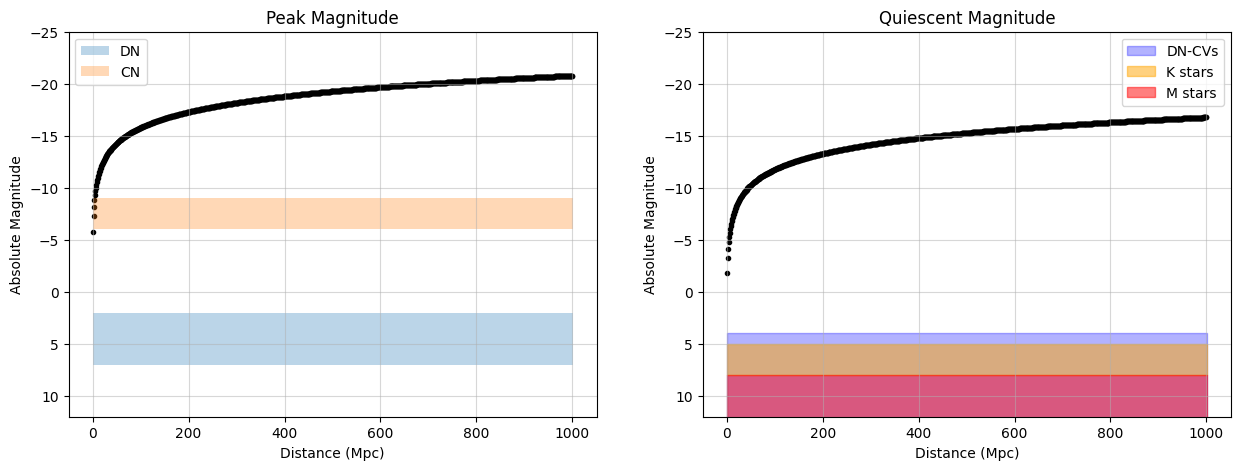

In [55]:
# same plot as previous, now with larger distance range

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.scatter(d_range_far, abs_mags_peak_far, marker='.', color='k')
# ax1.axhline(5.2, ls='--')
ax1.fill_between([0,dist_max], 2, 7, alpha = 0.3, label='DN') # Kawash, A. et al (2021)
ax1.fill_between([0,dist_max], -9, -6, alpha = 0.3, label='CN') # Kawash, A. et al (2021) (-10 -- -4), from Allen Shafter (-7.5 +/- 1.5)

ax1.set_ylabel('Absolute Magnitude')
ax1.set_xlabel('Distance (Mpc)')
ax1.set_ylim([12,-25])
ax1.grid(alpha=0.5) 
ax1.set_title('Peak Magnitude')
ax1.legend()

#############################################

ax2.scatter(d_range_far, abs_mags_qsnt, marker='.', color='k')
ax2.fill_between([-0.5,dist_max+0.5], 4, 15, alpha = 0.3, color='blue', label='DN-CVs') # Coppejans, D. et al. (2016) 
ax2.fill_between([0,dist_max], 5,8, alpha = 0.5, color='orange', label='K stars')
ax2.fill_between([0,dist_max], 8, 17, alpha = 0.5, color='red', label='M stars')

ax2.set_ylabel('Absolute Magnitude')
ax2.set_xlabel('Distance (Mpc)')
ax2.set_title('Quiescent Magnitude')
ax2.set_ylim([12,-25])
ax2.grid(alpha=0.5)
ax2.legend()

## Comparing to other transient classes

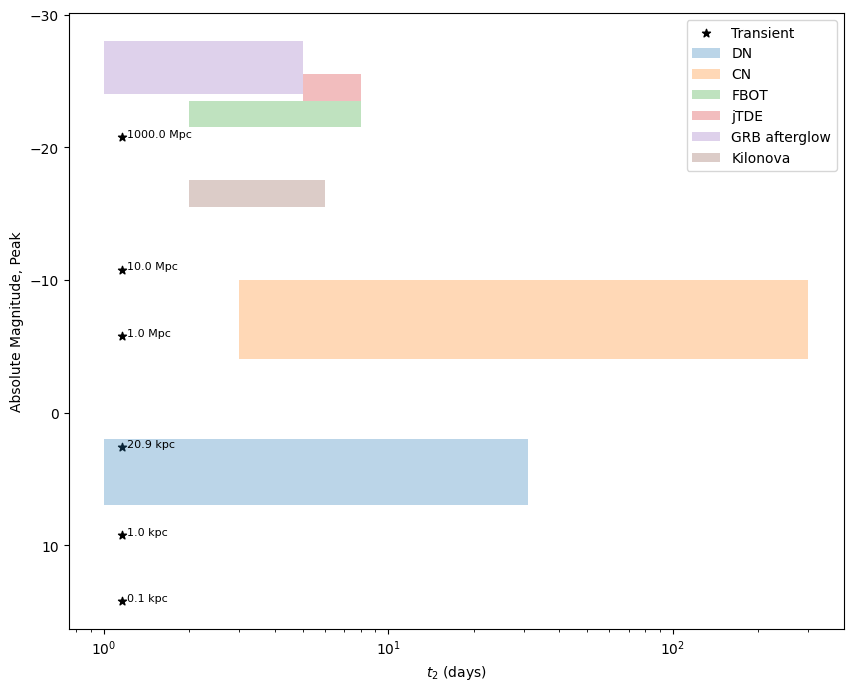

In [63]:
# plot transient at different distances/ absolute mags

plt.figure(figsize=(10,8))

# near distances
# t2 (time to fade 2 magnitudes from peak) taken from AT2022kak light curve
t2 = 1.16 
plt.scatter(t2, abs_mags_peak[1], marker='*', color='k', label='Transient')
plt.text(t2+0.05, abs_mags_peak[1], f'{np.round(d_range[1],2)} kpc', fontsize=8)

plt.scatter(t2, abs_mags_peak[10], marker='*', color='k')
plt.text(t2+0.05, abs_mags_peak[10], f'{np.round(d_range[10],2)} kpc', fontsize=8)

plt.scatter(t2, abs_mags_peak[-1], marker='*', color='k')
plt.text(t2+0.05, abs_mags_peak[-1], f'{np.round(d_range[-1],2)} kpc', fontsize=8)

# far distances
plt.scatter(t2, abs_mags_peak_far[1], marker='*', color='k')
plt.text(t2+0.05, abs_mags_peak_far[1], f'{np.round(d_range_far[1],2)} Mpc', fontsize=8)

plt.scatter(t2, abs_mags_peak_far[10], marker='*', color='k')
plt.text(t2+0.05, abs_mags_peak_far[10], f'{np.round(d_range_far[10],2)} Mpc', fontsize=8)

plt.scatter(t2, abs_mags_peak_far[-1], marker='*', color='k')
plt.text(t2+0.05, abs_mags_peak_far[-1], f'{np.round(d_range_far[-1],2)} Mpc', fontsize=8)


# plot different transient classes (rough estimations)
plt.fill_between([1, 31], 2, 7, alpha = 0.3, label='DN') # Kawash, A. et al (2021)
plt.fill_between([3,300], -10, -4, alpha = 0.3, label='CN') # Kawash, A. et al (2021)
plt.fill_between([2,8], -21.5, -23.5, alpha = 0.3, label='FBOT') # Inserra, C. et al (2019) - rough estimates
plt.fill_between([5,8], -23.5, -25.5, alpha = 0.3, label='jTDE') # Andreoni et al. (2022) & Levan et al. (2018)
plt.fill_between([1,5], -24, -28, alpha = 0.3, label='GRB afterglow') # Ho et al. (2022)
plt.fill_between([2,6], -15.5, -17.5, alpha = 0.3, label='Kilonova') # Andreoni et al. (2020)

plt.xscale('log')
plt.gca().invert_yaxis()
plt.xlabel('$t_2$ (days)')
plt.ylabel('Absolute Magnitude, Peak')
plt.legend()